In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import string as str
np.random.seed(17)
# data and target are given below 
# data is a numpy array consisting of 100 2-dimensional points
# target is a numpy array consisting of 100 values of 1 or -1
data = np.ones((100, 2))
data[:,0] = np.random.uniform(-1.5, 1.5, 100)
data[:,1] = np.random.uniform(-2, 2, 100)
z = data[:,0] ** 2 + ( data[:,1] - (data[:,0] ** 2) ** 0.333 ) ** 2  
target = np.asarray( z > 1.5, dtype = int) * 2 - 1
def build_kernel(data,sigma):
    n = np.shape(data)[0]
    kernel =np.zeros((n,n))
    for i in np.arange(n):
        for j in np.arange(n):
            kernel[i][j] = math.exp(- (np.linalg.norm(data[i,:]-data[j,:]))**2/(2*sigma**2))
    return kernel
def print_point(data,target):
    n = np.shape(target)[0]
    x = data[:,0]
    y = data[:,1]
    for i in np.arange(n):
        if target[i] == 1:
            plt.plot(x[i],y[i],'o',color ='b')
        else:
            plt.plot(x[i],y[i],'o',color ='r')         
def prediction(x,y,data,target,sigma,alpha):
    for i in range(len(data)): #loop for each data 
        sum = 0
        for j in range(len(data)):# for each prediction is 
            norm = (data[j][0]-x)*(data[j][0]-x)+(data[j][1]-y)*(data[j][1]-y)
            sum += alpha[j]*target[j]*np.exp(-norm/(2*sigma*sigma))
        return  sum
def plot_boundary(sigma,alpha):
    plot_delta = 0.05
    plot_x = np.arange(-2.5,2.5, plot_delta)
    plot_y = np.arange(-2.5,2.5, plot_delta)
    X, Y = np.meshgrid(plot_x, plot_y)
    x_len = plot_x.shape[0]
    y_len = plot_y.shape[0]
    Z = np.zeros((x_len, y_len))
    for i in range(x_len):
        for j in range(y_len):
            Z[j][i] =prediction(X[j][i],Y[j][i],data,target,sigma,alpha)
    cs = plt.contour(X, Y, Z,levels = 0)
    print_point(data,target)
    plt.clabel(cs,fontsize=10)
    plt.title('boundry for sigma = %e ' %(sigma))
    plt.show()    
    plt.savefig('boundry for sigma = %f.png' %(sigma))
    

ker_0=build_kernel(data,0.1)
ker_1=build_kernel(data,1)
n=np.shape(data)[0]
alpha_0= np.zeros(n)
alpha_1= np.zeros(n)

for p in np.arange(40):
    for i in np.arange(n):#loop for example
        sum_0=0
        for j in np.arange(n): # loop for sum
            sum_0 += alpha_0[j]*target[j]*ker_0[j,i]
        if sum_0*target[i]>0:
            continue
        else:
            alpha_0[i]+=1 
#print(alpha_0)

for q in range(40):
    for i in range(len(data)):
        sum = 0
        for j in range(len(data)):
            sum += alpha_1[j]*target[j]*ker_1[j,i]
        if sum*target[i]>0:
            continue
        else:
            alpha_1[i] += 1
#print(alpha_1)

plot_boundary(0.1,alpha_0)
plot_boundary(1,alpha_1)

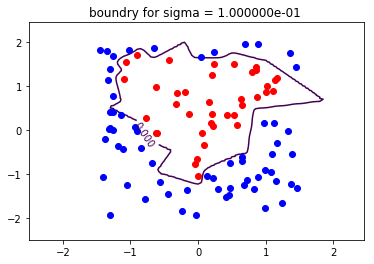

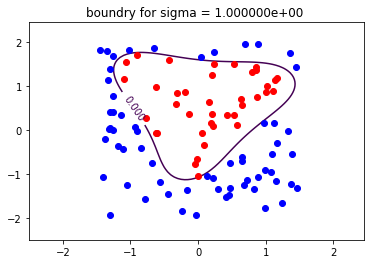